In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [7]:
#Exercise 2 

#a)
import pandas as pd 

#b)
index = pd.period_range(start='1950-01-01', end='2018-12-31', freq='D')
D_avg = pd.Series([1]*len(index),index)
dt = 1.0/365.0
S0 = 1
mu = 0.06
sigma = 0.2
rand = np.random.randn(len(index))
D_avg.update(pd.Series(S0*np.exp(np.cumsum((mu-sigma**2/2)*dt+sigma*rand*np.sqrt(dt))), index=index))
print(D_avg)

1950-01-01     1.006603
1950-01-02     1.014487
1950-01-03     1.010773
1950-01-04     1.023998
1950-01-05     1.010663
                ...    
2018-12-27    29.075230
2018-12-28    29.016849
2018-12-29    28.947501
2018-12-30    28.329648
2018-12-31    28.538460
Freq: D, Length: 25202, dtype: float64


the lenght is 25202


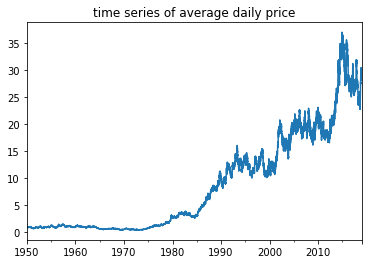

In [8]:
#c)
print('the lenght is %d' % len(D_avg)) 
D_avg.plot(title = 'time series of average daily price') 

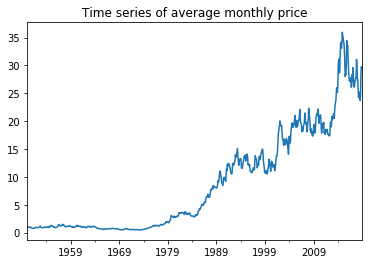

In [9]:
#d) e)
M_avg=D_avg.resample('M').mean()
M_avg.plot(title = 'Time series of average monthly price')

Daily 
Summary statistics:
count    25202.000000
mean         8.748401
std          9.116147
min          0.467536
25%          0.993776
50%          3.559342
75%         15.174652
max         37.082604
dtype: float64

There are 25202 values

annaualized mean = 0.0484427 
annualized standard deviation = 0.2003169. 


Weekly 
Summary statistics:
count    3602.000000
mean        8.745218
std         9.114781
min         0.471228
25%         0.994684
50%         3.570675
75%        15.135026
max        36.800738
dtype: float64

There are 3602 values

annaualized mean = 0.0482985 
annualized standard deviation = 0.2008122. 


Monthly 
Summary statistics:
count    828.000000
mean       8.733492
std        9.109906
min        0.478326
25%        0.993020
50%        3.585848
75%       15.226260
max       35.995229
dtype: float64

There are 828 values

annaualized mean = 0.0487771 
annualized standard deviation = 0.2018590. 




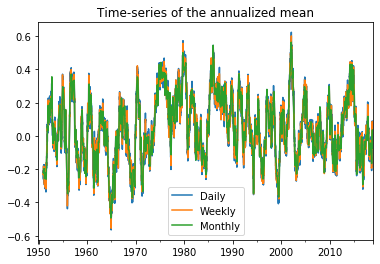

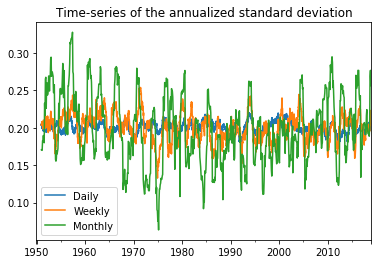

In [10]:
#Exrcise 3 

freq = ['D','W','M'] #frequency
desc_freq = ['Daily', 'Weekly', 'Monthly'] #Description for plots
yearly_freq = [365,52,12]
logret=[]

for f in freq:
    i = freq.index(f) #position

    #a)
    resam = D_avg.resample(f,convention = 'start').first()
    n=len(resam.values)
    logret = np.log(resam/resam.shift(1))

    #We save values of f_logret for part d)
    #logret.append(f_logret)
    
    #b)
    f_stat = resam.describe() 
    print( '%s \nSummary statistics:' % desc_freq[i])
    print(f_stat)
    print( '\nThere are %d values' % len(resam))

    #c)
    f_annualized_mean = np.mean(logret)*yearly_freq[i]
    f_annualized_std = np.std(logret)*np.sqrt(yearly_freq[i])
    print( '\nannaualized mean = %.7f \nannualized standard deviation = %.7f. \n\n'  % (f_annualized_mean,f_annualized_std)) 

    #d mean
    plt.figure(0)
    (logret.rolling(yearly_freq[i]).mean()*yearly_freq[i]).plot(label=desc_freq[i])
    plt.title('Time-series of the annualized mean')
    plt.legend()



    #d std
    plt.figure(1)
    (logret.rolling(yearly_freq[i]).std()*np.sqrt(yearly_freq[i])).plot(label=desc_freq[i])
    plt.title('Time-series of the annualized standard deviation')
    plt.legend()

    del logret
    del resam


e)
Annualized mean is similar for different frequences. Regarding standard deviation, we notice that, even changing the frequence, we always get a quite noisy estimation. Therefore, it is evident that changing frequence is not a good way to improve the estimation. It is known that to improve our estimation we should use a larger sampler (increase the observations). However increasing the frequence the noise is reduced. In conclusion, changes in frequence do not bring any relevant contributions in terms of mean, but a daily frequence helps to reduce the noise 



In [45]:
#f
theretical_mu=0.06
theretical_var=0.04 #here we are working over groups of lenght 1 year so T=1
logret = np.log(D_avg/D_avg.shift(1))
Annual_bins= logret.resample('A')
Annual_bins = Annual_bins.mean()*365
day_est_mean = Annual_bins.mean()
dailysqrt = logret **2
t_var_sigma_d=2*theretical_var**2/365+4*theretical_mu**2*theretical_var/365**2
t_mu_sigma_d= theretical_var+dailysqrt.mean()
d_var = dailysqrt.resample('A')
var_d= d_var.mean()*365

#monthly
M_avg = D_avg.resample('M',convention = 'start').first()
m_logret = np.log(M_avg/M_avg.shift(1))
mAnnual_bins= m_logret.resample('A')
mAnnual_bins = mAnnual_bins.mean()*12
month_est_mean = mAnnual_bins.mean()
monthsqrt = m_logret **2
t_var_sigma_m=2*theretical_var**2/12+4*theretical_mu**2*theretical_var/12**2
t_mu_sigma_m= theretical_var+monthsqrt.mean()
m_var = monthsqrt.resample('A')
var_m= m_var.mean()*12

In [40]:
print("Theoretical Moments of daily Sample Mean       : mean : 0.0600   variance: 0.0400")
print("Estimated  Moments of daily Sample Mean        : mean : %1.5f   variance: %1.5f"%( day_est_mean,Annual_bins.var()))
print("Theoretical Moments of  daily Sample variance  : mean : %1.5f   variance: %1.10f"%( t_mu_sigma_d,t_var_sigma_d))
print("estimated Moments of  daily Sample variance    : mean : %1.5f   variance: %1.10f"%( var_d.mean(),var_d.var()))

Theoretical Moments of daily Sample Mean       : mean : 0.0600   variance: 0.0400
Estimated  Moments of daily Sample Mean        : mean : 0.04846   variance: 0.03685
Theoretical Moments of  daily Sample variance  : mean : 0.04011   variance: 0.0000087714
estimated Moments of  daily Sample variance    : mean : 0.04013   variance: 0.0000077231


In [44]:
print("Theoretical Moments of monthly Sample Mean         : mean : 0.0600    variance: 0.0400")
print("Estimated  Moments of monthly Sample Mean          : mean : %1.5f   variance: %1.5f"%( month_est_mean,mAnnual_bins.var()))

print("Theoretical Moments of  monthly Sample variance    : mean : %1.5f   variance: %1.10f"%( t_mu_sigma_m,t_var_sigma_m))
print("estimated Moments of  monthly Sample variance      : mean : %1.5f   variance: %1.10f"%( var_m.mean(),var_m.var()))

Theoretical Moments of monthly Sample Mean         : mean : 0.0600    variance: 0.0400
Estimated  Moments of monthly Sample Mean          : mean : 0.04860   variance: 0.03642
Theoretical Moments of  monthly Sample variance    : mean : 0.04341   variance: 0.0002706667
estimated Moments of  monthly Sample variance      : mean : 0.04091   variance: 0.0003504878
